In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load data 
climbing = pd.read_csv("./climbing_dataset/climber_df.csv")
climbing.head()
# 10927 rows x 16 columns
# 26 countries, most European
# 0=male, 1=female
# mean age 33 years, 12 min, 69 max

,user_id,country,sex,height,weight,age,years_cl,date_first,date_last,grades_count,grades_first,grades_last,grades_max,grades_mean,year_first,year_last
0,1,SWE,0,177,73,41.0,21,1999-02-06 23:00:00,2001-07-31 22:00:00,84,36,55,62,46.750000,1999,2001
1,3,SWE,0,180,78,44.0,22,1999-03-31 22:00:00,2000-07-19 22:00:00,12,53,51,59,52.833333,1999,2000
2,4,SWE,1,165,58,33.0,16,2004-06-30 22:00:00,2009-05-26 22:00:00,119,53,49,64,53.890756,2004,2009
3,10,SWE,0,167,63,52.0,25,2000-01-14 23:00:00,2017-06-01 22:00:00,298,53,49,63,49.406040,2000,2017
4,16,NOR,0,177,68,44.0,21,1998-02-27 23:00:00,2010-05-13 22:00:00,5,53,49,53,51.400000,1998,2010


In [3]:
# which target we will try to predict
target = 'grades_max'

In [4]:
# print descriptives
climbing.describe()

,user_id,sex,height,weight,age,years_cl,grades_count,grades_first,grades_last,grades_max,grades_mean,year_first,year_last
count,10927.00000,10927.000000,10927.000000,10927.000000,10927.000000,10927.000000,10927.000000,10927.000000,10927.000000,10927.000000,10927.000000,10927.000000,10927.000000
mean,29411.09774,0.125103,176.152009,67.608676,33.333852,12.672188,79.794546,45.648851,46.983802,53.764437,45.505055,2008.621946,2012.311613
std,18022.12695,0.330851,8.508669,9.677316,7.590989,6.108451,141.411297,9.478173,9.418087,9.679533,7.891356,28.833298,4.161484
min,1.00000,0.000000,137.000000,40.000000,12.000000,1.000000,1.000000,28.000000,28.000000,29.000000,28.500000,0.000000,1991.000000
25%,14651.00000,0.000000,171.000000,63.000000,28.000000,8.000000,8.000000,38.000000,40.000000,46.000000,39.400000,2006.000000,2009.000000
50%,27323.00000,0.000000,177.000000,68.000000,33.000000,12.000000,28.000000,46.000000,48.000000,55.000000,45.151899,2009.000000,2013.000000
75%,43240.50000,0.000000,182.000000,73.000000,38.000000,17.000000,90.000000,53.000000,53.000000,62.000000,51.210084,2012.000000,2016.000000
max,67020.00000,1.000000,202.000000,93.000000,69.000000,29.000000,2445.000000,75.000000,77.000000,77.000000,75.272727,2017.000000,2017.000000


In [5]:
# first pass: frist drop country and date first and last and predict grades max
X = climbing.drop(['user_id','grades_first','grades_last','grades_max','grades_mean','date_first','date_last'],axis=1)

# one hot encode country
one_hot_encoded = pd.get_dummies(X['country'])

# Concatenate the one-hot encoded columns with the original DataFrame
X_encoded = pd.concat([X, one_hot_encoded], axis=1)

# remove original country column
X_encoded.drop(labels='country',axis=1, inplace=True)

X_encoded.head()

,sex,height,weight,age,years_cl,grades_count,year_first,year_last,AUS,AUT,...,NLD,NOR,POL,PRT,RUS,SVN,SWE,USA,ZAF,other
0,0,177,73,41.0,21,84,1999,2001,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,180,78,44.0,22,12,1999,2000,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,165,58,33.0,16,119,2004,2009,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,167,63,52.0,25,298,2000,2017,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,177,68,44.0,21,5,1998,2010,0,0,...,0,1,0,0,0,0,0,0,0,0


In [6]:
# feature engineering: compute BMI
X_encoded['BMI'] = X_encoded['weight'] / (X_encoded['height']/100)**2

In [7]:
68/(177/100)**2

21.705129432793896

In [8]:
# define y: highest grade climbed
y = climbing[target]

In [9]:
# make predictions
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [10]:
# evaluate predictions
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error
rmse = np.sqrt(mse)

print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 7.159365904538235


In [11]:
# asses scale of target variable
print(f'The grades vary between {y.min()} and {y.max()} units')

The grades vary between 29 and 77 units


In [12]:
# find out which features contribute most to the prediction by getting the coefficients

# Get the feature coefficients
feature_coefs = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})

# Sort the coefficients by magnitude
feature_coefs = feature_coefs.reindex(feature_coefs['Coefficient'].sort_values(ascending=False).index)

# Print the feature coefficients
print(feature_coefs)

         Feature  Coefficient
14           CZE     2.525362
23           MEX     2.169332
8            AUS     1.544887
28           RUS     1.466308
33         other     1.235210
19           FRA     1.166471
29           SVN     1.002033
20           GBR     0.981278
4       years_cl     0.872688
9            AUT     0.833677
13           CHE     0.791747
7      year_last     0.757167
12           CAN     0.636999
31           USA     0.586103
15           DEU     0.571232
22           ITA     0.564568
25           NOR     0.437013
34           BMI     0.365700
1         height     0.181884
5   grades_count     0.015406
6     year_first    -0.007634
11           BRA    -0.139831
3            age    -0.322187
2         weight    -0.350286
16           DNK    -0.407787
17           ESP    -0.617422
10           BEL    -0.784257
24           NLD    -1.188786
21           HRV    -1.513486
26           POL    -1.554256
30           SWE    -1.820156
18           FIN    -2.291873
32        

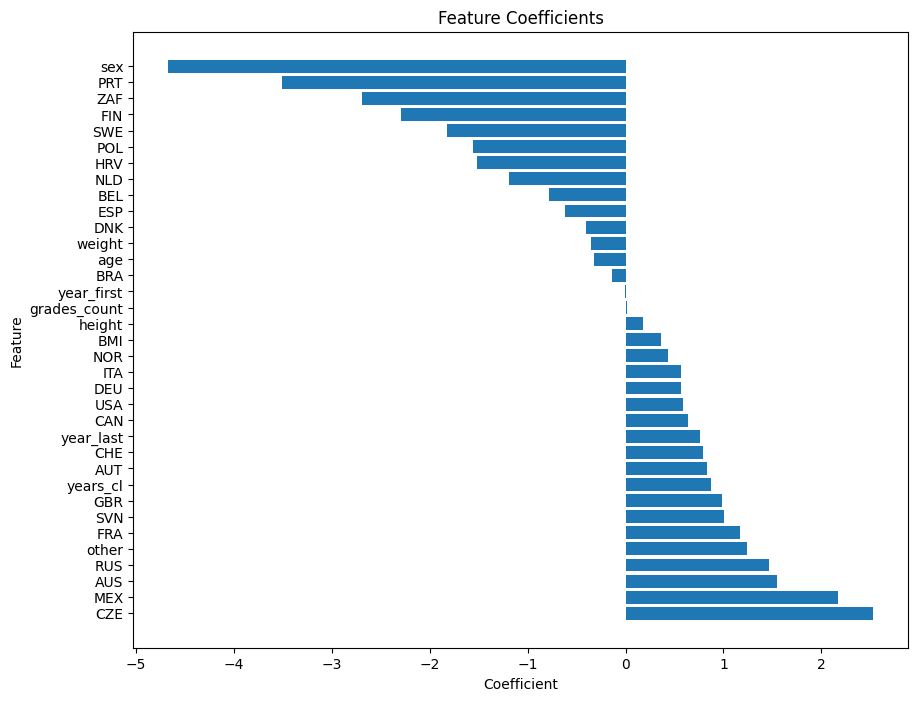

In [13]:
import matplotlib.pyplot as plt

# Plot the feature coefficients
plt.figure(figsize=(10, 8))
plt.barh(feature_coefs['Feature'], feature_coefs['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Coefficients')
plt.show()